In [2]:
import json
from json import JSONEncoder
import pandas as pd
import pandasql as ps
from datetime import datetime

Exercise 1: Convert the following dictionary into JSON format

In [ ]:
data = {"key1" : "value1", "key2" : "value2"}

In [5]:
my_json = json.dumps(data)
print(my_json)

{"key1": "value1", "key2": "value2"}


Exercise 2: Access the value of key2 from the following JSON

In [8]:
sampleJson = """{"key1": "value1", "key2": "value2"}"""

In [ ]:
dict = json.loads(sampleJson)
print(dict['key2'])

'value2'

Exercise 3: PrettyPrint following JSON data

In [5]:
sampleJson = {"key1": "value1", "key2": "value2"}
print(json.dumps(sampleJson, indent=4, sort_keys=True, separators=(","," = ")))

{
    "key1" = "value1",
    "key2" = "value2"
}


Exercise 4: Sort JSON keys in and write them into a file

In [10]:
sampleJson = {"id" : 1, "name" : "value2", "age" : 29}

In [14]:
with open("/Users/scarlettattensil/Downloads/my_file.json", "w") as file:
    json.dump(sampleJson, file, indent = 4, sort_keys=True)

Exercise 5: Access the nested key ‘salary’ from the following JSON

In [ ]:
sampleJson = """{ 
   "company":{ 
      "employee":{ 
         "name":"emma",
         "payble":{ 
            "salary":7000,
            "bonus":800
         }
      }
   }
}"""


In [17]:
my_dict = json.loads(sampleJson)
print(my_dict['company']['employee']['payble']['salary'])

7000


Exercise 6: Convert the following Vehicle Object into JSON

In [18]:
class Vehicle:
    def __init__(self, name, engine, price):
        self.name = name
        self.engine = engine
        self.price = price

vehicle = Vehicle("Toyota Rav4", "2.5L", 32000)

In [ ]:
json.dumps(vehicle.__dict__)

'{"name": "Toyota Rav4", "engine": "2.5L", "price": 32000}'

In [ ]:
class Vehicle:
    def __init__(self, name, engine, price):
        self.name = name
        self.engine = engine
        self.price = price

class VehicleEncoder(JSONEncoder):
        def default(self, o):
            return o.__dict__

vehicle = Vehicle("Toyota Rav4", "2.5L", 32000)

print("Encode Vehicle Object into JSON")
vehicleJson = json.dumps(vehicle, indent=4, cls=VehicleEncoder)
print(vehicleJson)

Exercise 7: Convert the following JSON into Vehicle Object

In [21]:
my_dict = { "name": "Toyota Rav4", "engine": "2.5L", "price": 32000 }
vehicle = Vehicle(**my_dict)

Exercise 8: Check whether following json is valid or invalid. If Invalid correct it

In [24]:
my_string = '''{ 
   "company":{ 
      "employee":{ 
         "name":"emma",
         "payble":{ 
            "salary":7000,
            "bonus":800
         }
      }
   }
}'''

my_dict = json.loads(my_string)

In [26]:
import json

def validateJSON(jsonData):
    try:
        json.loads(jsonData)
    except ValueError as err:
        return False
    return True

InvalidJsonData = """{ "company":{ "employee":{ "name":"emma", "payble":{ "salary":7000 "bonus":800} } } }"""
isValid = validateJSON(InvalidJsonData)

print("Given JSON string is Valid", isValid)

Given JSON string is Valid False


In [25]:
#run in terminal:
!echo { "company":{ "employee":{ "name":"emma", "payble":{ "salary":7000 "bonus":800} } } } | python -m json.tool


zsh:1: parse error near `}'


Exercise 9: Parse the following JSON to get all the values of a key ‘name’ within an array

In [2]:
my_string = '''[ 
   { 
      "id":1,
      "name":"name1",
      "color":[ 
         "red",
         "green"
      ]
   },
   { 
      "id":2,
      "name":"name2",
      "color":[ 
         "pink",
         "yellow"
      ]
   }
]'''


In [6]:
[i['name'] for i in json.loads(my_string)]

['name1', 'name2']

In [2]:
events = '''[
    {"yard_id": "Y1", "trailer_id": "T1", "event_type": "arrival", "timestamp": "2024-11-25T08:00:00"},
    {"yard_id": "Y1", "trailer_id": "T1", "event_type": "departure", "timestamp": "2024-11-25T14:00:00"},
    {"yard_id": "Y2", "trailer_id": "T2", "event_type": "arrival", "timestamp": "2024-11-25T09:00:00"},
    {"yard_id": "Y2", "trailer_id": "T2", "event_type": "departure", "timestamp": "2024-11-25T18:00:00"},
    {"yard_id": "Y1", "trailer_id": "T3", "event_type": "arrival", "timestamp": "2024-11-25T10:00:00"},
    {"yard_id": "Y1", "trailer_id": "T3", "event_type": "departure", "timestamp": "2024-11-25T15:00:00"}
]'''


In [3]:
data = pd.DataFrame(json.loads(events))
data['timestamp'] = pd.to_datetime(data['timestamp'])
data

,yard_id,trailer_id,event_type,timestamp
0,Y1,T1,arrival,2024-11-25 08:00:00
1,Y1,T1,departure,2024-11-25 14:00:00
2,Y2,T2,arrival,2024-11-25 09:00:00
3,Y2,T2,departure,2024-11-25 18:00:00
4,Y1,T3,arrival,2024-11-25 10:00:00
5,Y1,T3,departure,2024-11-25 15:00:00


In [4]:
#Total number of unique trailers that visited each yard.
result = data.groupby(['yard_id'])['trailer_id'].nunique()
print(result)

yard_id
Y1    2
Y2    1
Name: trailer_id, dtype: int64


In [5]:
#The yard with the most trailer visits (count each trailer separately, even if it visited multiple times).
arrivals = data[data['event_type'] == 'arrival']
result = arrivals .groupby(['yard_id'])['trailer_id'].count()
print(result)

yard_id
Y1    2
Y2    1
Name: trailer_id, dtype: int64


In [7]:
#Average time trailers spend parked in each yard.
times = []
for i  in set(data['trailer_id']):
    for j  in set(data['yard_id']):
        if len(data[(data['trailer_id']==i) & (data['yard_id']==j)])  > 0:
            max_time = data[(data['trailer_id']==i) & (data['yard_id']==j)]['timestamp'].max()
            min_time = data[(data['trailer_id']==i) & (data['yard_id']==j)]['timestamp'].min()
            print(max_time, min_time, i, j)
            times.append((max_time- min_time).total_seconds() / 60)

sum(times)/len(times)


2024-11-25 15:00:00 2024-11-25 10:00:00 T3 Y1
2024-11-25 14:00:00 2024-11-25 08:00:00 T1 Y1
2024-11-25 18:00:00 2024-11-25 09:00:00 T2 Y2


400.0

In [8]:
max(stay_durations)

NameError: name 'stay_durations' is not defined

In [12]:
#Identify the yard with the highest average parking duration.
times = {}
for i  in set(data['trailer_id']):
    for j  in set(data['yard_id']):
        if len(data[(data['trailer_id']==i) & (data['yard_id']==j)])  > 0:
            max_time = data[(data['trailer_id']==i) & (data['yard_id']==j)]['timestamp'].max()
            min_time = data[(data['trailer_id']==i) & (data['yard_id']==j)]['timestamp'].min()
            times[(i,j)] = (max_time - min_time).total_seconds() / 60

stay_durations = [float(v) for k,v in times.items()]
max_duration = max(stay_durations)
[k[1] for k, v in times.items() if v == max_duration]

['Y2']

In [13]:
import pandas as pd

# Initialize a dictionary to store total durations and counts per yard
yard_durations = {}

# Iterate over unique trailer and yard pairs
for trailer_id in data['trailer_id'].unique():
    for yard_id in data['yard_id'].unique():
        # Filter data for the current trailer_id and yard_id
        filtered_data = data[(data['trailer_id'] == trailer_id) & (data['yard_id'] == yard_id)]
        
        # If there are any records for this trailer-yard pair
        if len(filtered_data) > 0:
            # Calculate max and min timestamps for the filtered data
            max_time = filtered_data['timestamp'].max()
            min_time = filtered_data['timestamp'].min()
            
            # Calculate parking duration in minutes
            duration_minutes = (max_time - min_time).total_seconds() / 60
            
            # Accumulate total duration and count for the yard
            if yard_id in yard_durations:
                yard_durations[yard_id]['total_duration'] += duration_minutes
                yard_durations[yard_id]['count'] += 1
            else:
                yard_durations[yard_id] = {'total_duration': duration_minutes, 'count': 1}

# Calculate the average parking duration for each yard
average_durations = {yard: info['total_duration'] / info['count'] for yard, info in yard_durations.items()}

# Find the yard with the highest average parking duration
max_yard = max(average_durations, key=average_durations.get)
print(f"The yard with the highest average parking duration is: {max_yard}")


The yard with the highest average parking duration is: Y2


In [15]:
string = '''[
  {
    "order_id": "O001",
    "customer_id": "C001",
    "products": [
      {"product_id": "P001", "quantity": 2, "price_per_unit": 10.0},
      {"product_id": "P002", "quantity": 1, "price_per_unit": 15.0}
    ],
    "order_date": "2024-11-01"
  },
  {
    "order_id": "O002",
    "customer_id": "C002",
    "products": [
      {"product_id": "P003", "quantity": 3, "price_per_unit": 20.0}
    ],
    "order_date": "2024-11-02"
  },
  {
    "order_id": "O003",
    "customer_id": "C001",
    "products": [
      {"product_id": "P001", "quantity": 1, "price_per_unit": 10.0},
      {"product_id": "P004", "quantity": 2, "price_per_unit": 30.0}
    ],
    "order_date": "2024-11-03"
  }
]'''


In [17]:
my_data = pd.DataFrame(json.loads(string))
my_data

,order_id,customer_id,products,order_date
0,O001,C001,"[{'product_id': 'P001', 'quantity': 2, 'price_...",2024-11-01
1,O002,C002,"[{'product_id': 'P003', 'quantity': 3, 'price_...",2024-11-02
2,O003,C001,"[{'product_id': 'P001', 'quantity': 1, 'price_...",2024-11-03


In [23]:
expanded

[  product_id  quantity  price_per_unit order_id customer_id  order_date
 0       P001         2            10.0     O001        C001  2024-11-01
 1       P002         1            15.0     O001        C001  2024-11-01,
   product_id  quantity  price_per_unit order_id customer_id  order_date
 0       P003         3            20.0     O002        C002  2024-11-02,
   product_id  quantity  price_per_unit order_id customer_id  order_date
 0       P001         1            10.0     O003        C001  2024-11-03
 1       P004         2            30.0     O003        C001  2024-11-03]

In [ ]:
expanded = pd.DataFrame()
for index, row in my_data.iterrows():
    data = pd.DataFrame(row['products'])
    data['order_id'] = row['order_id']
    data['customer_id'] = row['customer_id']
    data['order_date'] = row['order_date']
    expanded = pd.concat([expanded, data])

expanded


,product_id,quantity,price_per_unit,order_id,customer_id,order_date
0,P001,2,10.0,O001,C001,2024-11-01
1,P002,1,15.0,O001,C001,2024-11-01
0,P003,3,20.0,O002,C002,2024-11-02
0,P001,1,10.0,O003,C001,2024-11-03
1,P004,2,30.0,O003,C001,2024-11-03


Customer who spent the most:

    Identify the customer and the total amount they spent.

Most popular product:

    Identify the product and the total quantity purchased.

Summary Report:

    A table showing each customer's total spend and the number of orders they placed.

In [37]:
expanded['item_total'] = expanded['quantity']*expanded['price_per_unit']
grouped = expanded.groupby('customer_id').agg(
    total_quantity=('quantity', 'sum'),
    total_spend=('item_total', 'sum')
)
grouped = grouped.reset_index()
grouped.sort_values('total_spend', ascending = False)[['customer_id','total_spend']].head(1)

,customer_id,total_spend
0,C001,105.0


In [ ]:
#Suggested Improvement (Optimized Sorting):

top_customer = grouped.loc[grouped['total_spend'].idxmax()]

In [ ]:
expanded['item_total'] = expanded['quantity']*expanded['price_per_unit']
grouped = expanded.groupby('product_id').agg(
    total_quantity=('quantity', 'sum'),
    total_spend=('item_total', 'sum')
)
grouped = grouped.reset_index()
grouped.sort_values('total_quantity', ascending = False)[['product_id','total_quantity']].head(1)

,product_id,total_quantity
0,P001,3


In [41]:
expanded['item_total'] = expanded['quantity']*expanded['price_per_unit']
grouped = expanded.groupby('customer_id').agg(
    total_quantity=('quantity', 'sum'),
    total_spend=('item_total', 'sum'),
    total_orders=('order_id', 'nunique')
)
grouped = grouped.reset_index()
grouped

,customer_id,total_quantity,total_spend,total_orders
0,C001,6,105.0,2
1,C002,3,60.0,1


In [42]:
import pandas as pd
import random
from datetime import datetime, timedelta
import json

# Helper function to generate random coordinates
def random_coordinates():
    # Generate random latitude and longitude within a specific range (approximate for US)
    lat = random.uniform(24.396308, 49.384358)  # Latitude range in the US
    lon = random.uniform(-125.0, -66.93457)  # Longitude range in the US
    return lat, lon

# Generate random data for deliveries
def generate_random_data(num_records):
    data = []
    for _ in range(num_records):
        delivery_id = random.randint(1000, 9999)
        warehouse_id = random.randint(1, 10)  # 10 warehouses
        customer_id = random.randint(1, 50)  # 50 customers
        quantity = random.randint(1, 100)
        price_per_unit = random.uniform(10.0, 500.0)
        
        # Random delivery time within the last 6 months
        delivery_time = datetime.now() - timedelta(days=random.randint(1, 180))
        
        # Random coordinates
        lat, lon = random_coordinates()

        # Create record
        data.append({
            "delivery_id": delivery_id,
            "warehouse_id": warehouse_id,
            "customer_id": customer_id,
            "delivery_time": delivery_time.isoformat(),
            "delivery_lat": lat,
            "delivery_lon": lon,
            "quantity": quantity,
            "price_per_unit": price_per_unit
        })
    
    return data

# Generate 100 records of random delivery data
num_records = 100
random_data = generate_random_data(num_records)

# Convert to JSON string for easy manipulation
json_data = json.dumps(random_data, indent=4)

# Load data into pandas DataFrame
my_data = pd.DataFrame(random_data)

my_data.head()  # Display first 5 rows of the generated data


,delivery_id,warehouse_id,customer_id,delivery_time,delivery_lat,delivery_lon,quantity,price_per_unit
0,5394,1,28,2024-08-27T11:06:25.984959,40.674887,-105.720556,82,87.208978
1,1480,3,27,2024-11-19T11:06:25.984984,42.356076,-105.445706,46,163.552150
2,5365,4,13,2024-07-07T11:06:25.984989,28.041055,-95.662774,87,253.834508
3,8360,7,7,2024-07-20T11:06:25.984993,31.345729,-76.639498,62,228.153325
4,2323,9,44,2024-06-22T11:06:25.984997,37.464349,-94.080045,50,284.222253


Identify the customer who made the most deliveries (based on the number of deliveries).

In [45]:
my_data['total_price'] = my_data['quantity']*my_data['price_per_unit']
grouped = my_data.groupby('customer_id').agg(deliveries= ('delivery_id', 'nunique'),customer_spend= ('total_price', 'sum'))
grouped = grouped.reset_index()
grouped.loc[grouped['deliveries'].idxmax()]

customer_id          49.000000
deliveries            7.000000
customer_spend    72828.826174
Name: 42, dtype: float64

Identify the warehouse with the highest total quantity of items delivered.

In [46]:
grouped = my_data.groupby('warehouse_id').agg(deliveries= ('delivery_id', 'nunique'),grouped_spend= ('total_price', 'sum'),grouped_quantity= ('quantity', 'sum'))
grouped = grouped.reset_index()
grouped.loc[grouped['grouped_quantity'].idxmax()]

warehouse_id             1.000000
deliveries              13.000000
grouped_spend       216122.277668
grouped_quantity       837.000000
Name: 0, dtype: float64

Find the total revenue generated in the month of June 2024. (Hint: You may need to filter delivery_time by month and year).

In [62]:
my_data['delivery_time'] = pd.to_datetime(my_data['delivery_time'])
my_data['month'] = my_data['delivery_time'].dt.month
my_data['year'] = my_data['delivery_time'].dt.year
filtered = my_data[(my_data['month'] == 6) & (my_data['year'] == 2024)]
sum(filtered['total_price'])

321093.4085061868

Identify the delivery closest to a specific location (e.g., lat=37.7749, lon=-122.4194 for San Francisco).

In [68]:
target_lat =37.7749
target_lon =-122.4194 
my_data['distance'] = ((my_data['delivery_lat'] - target_lat)**2 + (my_data['delivery_lon'] - target_lon)**2)**.5
my_data.loc[my_data['distance'].idxmin()]

delivery_id                             7651
warehouse_id                               1
customer_id                                7
delivery_time     2024-10-07 11:06:25.985011
delivery_lat                       39.413066
delivery_lon                     -121.527307
quantity                                  28
price_per_unit                    124.661992
total_price                      3490.535788
month                                     10
year                                    2024
distance                             1.86532
Name: 8, dtype: object

Calculate the average delivery time for each warehouse (based on the time difference between the first and last delivery for each warehouse).

In [93]:
my_data['date'] = my_data['delivery_time'].dt.date
my_data['time'] = my_data['delivery_time'].dt.time
my_data

,delivery_id,warehouse_id,customer_id,delivery_time,delivery_lat,delivery_lon,quantity,price_per_unit,total_price,month,year,distance,date,time
0,5394,1,28,2024-08-27 11:06:25.984959,40.674887,-105.720556,82,87.208978,7151.136177,8,2024,16.948785,2024-08-27,11:06:25.984959
1,1480,3,27,2024-11-19 11:06:25.984984,42.356076,-105.445706,46,163.552150,7523.398915,11,2024,17.581054,2024-11-19,11:06:25.984984
2,5365,4,13,2024-07-07 11:06:25.984989,28.041055,-95.662774,87,253.834508,22083.602194,7,2024,28.472175,2024-07-07,11:06:25.984989
3,8360,7,7,2024-07-20 11:06:25.984993,31.345729,-76.639498,62,228.153325,14145.506160,7,2024,46.229143,2024-07-20,11:06:25.984993
4,2323,9,44,2024-06-22 11:06:25.984997,37.464349,-94.080045,50,284.222253,14211.112639,6,2024,28.341056,2024-06-22,11:06:25.984997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1193,7,49,2024-07-27 11:06:25.985740,41.328348,-88.036301,42,49.291130,2070.227468,7,2024,34.566233,2024-07-27,11:06:25.985740
96,1251,1,31,2024-06-29 11:06:25.985744,29.382202,-99.961955,91,269.325779,24508.645919,6,2024,23.974449,2024-06-29,11:06:25.985744
97,9327,10,29,2024-08-31 11:06:25.985747,33.612911,-79.500948,87,188.944171,16438.142852,8,2024,43.119783,2024-08-31,11:06:25.985747
98,3462,1,25,2024-09-01 11:06:25.985751,37.155596,-113.645924,91,90.352147,8222.045359,9,2024,8.795306,2024-09-01,11:06:25.985751


In [100]:
grouped = my_data.groupby(['warehouse_id','date' ]).agg(first = ('delivery_time','min'), last = ('delivery_time','max'))
grouped = grouped.reset_index()
grouped['time_difference'] = (grouped['last'] - grouped['first']).dt.total_seconds() / 60
grouped

,warehouse_id,date,first,last,time_difference
0,1,2024-06-29,2024-06-29 11:06:25.985744,2024-06-29 11:06:25.985744,0.0
1,1,2024-06-30,2024-06-30 11:06:25.985119,2024-06-30 11:06:25.985119,0.0
2,1,2024-07-05,2024-07-05 11:06:25.985139,2024-07-05 11:06:25.985139,0.0
3,1,2024-07-16,2024-07-16 11:06:25.985717,2024-07-16 11:06:25.985717,0.0
4,1,2024-07-19,2024-07-19 11:06:25.985707,2024-07-19 11:06:25.985707,0.0
...,...,...,...,...,...
93,10,2024-09-02,2024-09-02 11:06:25.985596,2024-09-02 11:06:25.985596,0.0
94,10,2024-09-20,2024-09-20 11:06:25.985080,2024-09-20 11:06:25.985080,0.0
95,10,2024-09-27,2024-09-27 11:06:25.985091,2024-09-27 11:06:25.985091,0.0
96,10,2024-10-30,2024-10-30 11:06:25.985681,2024-10-30 11:06:25.985681,0.0


In [102]:
data = [
    {"delivery_id": 1, "warehouse_id": 101, "start_time": "2024-06-01 08:00:00", "end_time": "2024-06-01 15:30:00", "delivery_lat": 40.7128, "delivery_lon": -74.0060},
    {"delivery_id": 2, "warehouse_id": 101, "start_time": "2024-06-01 09:00:00", "end_time": "2024-06-01 12:15:00", "delivery_lat": 40.7306, "delivery_lon": -73.9352},
    {"delivery_id": 3, "warehouse_id": 102, "start_time": "2024-06-01 10:00:00", "end_time": "2024-06-01 18:00:00", "delivery_lat": 40.6643, "delivery_lon": -73.9385},
    {"delivery_id": 4, "warehouse_id": 102, "start_time": "2024-06-02 11:00:00", "end_time": "2024-06-02 16:30:00", "delivery_lat": 40.7850, "delivery_lon": -73.8440}
]


In [112]:
df = pd.DataFrame(data)
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['duration'] = (df['end_time'] - df['start_time']).dt.total_seconds()/3600
from geopy.distance import geodesic
target_location = (40.7128,  -74.0060) #New York City
df['distance'] = my_data.apply(lambda row: geodesic((row['delivery_lat'], row['delivery_lon']), target_location).miles, axis=1)
grouped_wh = df.groupby('warehouse_id')['distance'].mean()
grouped_wh = grouped_wh.reset_index()
print(grouped_wh)

df['date'] = df['start_time'].dt.date
grouped_day = df.groupby('date')['delivery_id'].nunique()
grouped_day = grouped_day.reset_index()
print(grouped_day)


   warehouse_id     distance
0           101  1640.705383
1           102  1085.149689
         date  delivery_id
0  2024-06-01            3
1  2024-06-02            1


In [114]:
data = [
    {
        "delivery_id": 1,
        "warehouse_id": 101,
        "delivery_date": "2024-05-15",
        "description": "Electronics, Furniture, Clothing",
        "feedback": "Delivery was on time, but some items were damaged",
        "rating": 4.5
    },
    {
        "delivery_id": 2,
        "warehouse_id": 101,
        "delivery_date": "2024-05-22",
        "description": "Clothing, Accessories",
        "feedback": "Delayed delivery, but items were intact",
        "rating": 3.0
    },
    {
        "delivery_id": 3,
        "warehouse_id": 102,
        "delivery_date": "2024-06-01",
        "description": "Furniture, Appliances",
        "feedback": "Delivery was significantly delayed",
        "rating": 2.5
    },
    {
        "delivery_id": 4,
        "warehouse_id": 103,
        "delivery_date": "2024-06-10",
        "description": "Books, Electronics, Clothing",
        "feedback": "On-time delivery with no issues",
        "rating": 5.0
    },
    {
        "delivery_id": 5,
        "warehouse_id": 103,
        "delivery_date": "2024-06-20",
        "description": "Furniture, Books",
        "feedback": "Slight delay in delivery but good service overall",
        "rating": 4.0
    }
]


In [138]:
from collections import Counter

In [ ]:
df = pd.DataFrame(data)
df['categories'] = df['description'].str.split(", ")
all_categories = ", ".join(df['description']).split(", ")
dict(Counter(all_categories)


AttributeError: 'dict' object has no attribute 'sort_values'

In [146]:
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['year_month'] = 100*df['delivery_date'].dt.year + df['delivery_date'].dt.month
grouped = df.groupby('year_month').agg(avg_rating = ("rating", "mean"))
grouped = grouped.reset_index()
grouped.sort_values("year_month")

,year_month,avg_rating
0,202405,3.750000
1,202406,3.833333


In [155]:
filtered = df[df['feedback'].str.lower().str.contains('delay')]
grouped = filtered.groupby('warehouse_id').agg(delayed = ("delivery_id", "count"))
grouped = grouped.reset_index()
grouped

,warehouse_id,delayed
0,101,1
1,102,1
2,103,1


In [3]:
my_json = [
  {
    "driver_id": 1,
    "driver_name": "Alice",
    "start_time": "2024-07-01 08:00:00",
    "end_time": "2024-07-01 08:30:00",
    "pickup_lat": 40.73061,
    "pickup_lon": -73.935242,
    "dropoff_lat": 40.712776,
    "dropoff_lon": -74.005974,
    "price": 50,
    "rating": 4.5,
    "feedback": "Great service, very polite and quick."
  },
  {
    "driver_id": 2,
    "driver_name": "Bob",
    "start_time": "2024-07-01 09:00:00",
    "end_time": "2024-07-01 10:00:00",
    "pickup_lat": 40.73061,
    "pickup_lon": -73.935242,
    "dropoff_lat": 40.741895,
    "dropoff_lon": -73.989308,
    "price": 40,
    "rating": 3.8,
    "feedback": "Slow delivery, but polite."
  },
  {
    "driver_id": 1,
    "driver_name": "Alice",
    "start_time": "2024-07-02 08:15:00",
    "end_time": "2024-07-02 08:35:00",
    "pickup_lat": 40.741895,
    "pickup_lon": -73.989308,
    "dropoff_lat": 40.73061,
    "dropoff_lon": -73.935242,
    "price": 60,
    "rating": 4.7,
    "feedback": "Quick and efficient delivery!"
  },
  {
    "driver_id": 3,
    "driver_name": "Charlie",
    "start_time": "2024-07-01 10:30:00",
    "end_time": "2024-07-01 11:15:00",
    "pickup_lat": 40.73061,
    "pickup_lon": -73.935242,
    "dropoff_lat": 40.712776,
    "dropoff_lon": -74.005974,
    "price": 70,
    "rating": 4.9,
    "feedback": "Excellent driver, very professional!"
  }
]


In [ ]:
df = pd.DataFrame(my_json)
df['delivery_time'] = (pd.to_datetime(df['end_time']) - pd.to_datetime(df['start_time'])).dt.total_seconds()/60
grouped = df.groupby(['driver_id','driver_name']).agg(average_delivery_time = ('delivery_time','mean'))
grouped = grouped.reset_index()
grouped.sort_values('average_delivery_time')


,,average_delivery_time
driver_id,driver_name,
1,Alice,25.0
3,Charlie,45.0
2,Bob,60.0


In [33]:
import string
from collections import Counter
df['word_list'] = df['feedback'].str.replace(f"[{string.punctuation}]", "", regex=True).str.replace('the','').str.replace('and','').str.lower().str.split()
all_words = [word for sublist in df['word_list'] for word in sublist]
Counter(all_words).most_common()

[('very', 2),
 ('polite', 2),
 ('quick', 2),
 ('delivery', 2),
 ('great', 1),
 ('service', 1),
 ('slow', 1),
 ('but', 1),
 ('efficient', 1),
 ('excellent', 1),
 ('driver', 1),
 ('professional', 1)]

In [32]:
df = pd.DataFrame(my_json)
filtered = df[pd.to_datetime(df['end_time']).dt.to_period('M') == '2024-07']
grouped = filtered.groupby(['driver_id','driver_name']).agg(total_revenue = ('price','sum'))
grouped = grouped.reset_index()
grouped.sort_values('total_revenue', ascending= False)

,driver_id,driver_name,total_revenue
0,1,Alice,110
2,3,Charlie,70
1,2,Bob,40


In [25]:
df = pd.DataFrame(my_json)
df['delivery_time'] = (pd.to_datetime(df['end_time']) - pd.to_datetime(df['start_time'])).dt.total_seconds()/60
grouped = df.groupby(['driver_id','driver_name']).agg(average_delivery_time = ('delivery_time','mean'), average_rating = ('rating','mean'))
grouped = grouped.reset_index()
grouped.sort_values('average_rating')


,driver_id,driver_name,average_delivery_time,average_rating
1,2,Bob,60.0,3.8
0,1,Alice,25.0,4.6
2,3,Charlie,45.0,4.9


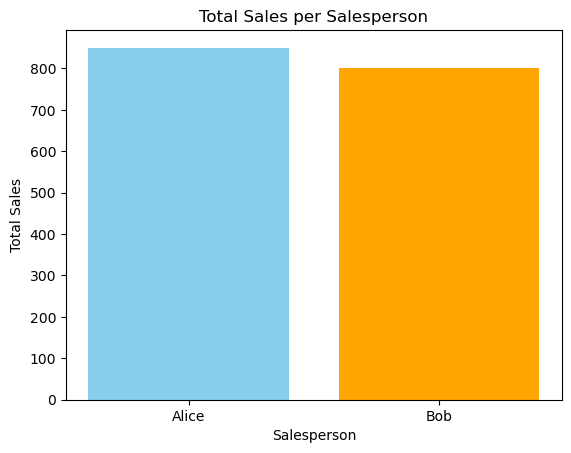

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = {
    'month': ['Jan', 'Jan', 'Feb', 'Feb', 'Mar', 'Mar'],
    'salesperson': ['Alice', 'Bob', 'Alice', 'Bob', 'Alice', 'Bob'],
    'sales': [200, 150, 250, 300, 400, 350]
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by salesperson and sum sales
grouped = df.groupby('salesperson')['sales'].sum().reset_index()

# Plot total sales per salesperson
plt.bar(grouped['salesperson'], grouped['sales'], color=['skyblue', 'orange'])
plt.xlabel('Salesperson')
plt.ylabel('Total Sales')
plt.title('Total Sales per Salesperson')
plt.show()
